# EPR-type entanglement of NDPA

$$\def \lk{\left(}
\def \rk{\right)}
\def \frop#1{\hat{\tilde{#1}}}
\def\thetap{\theta^\prime}
\def\ul#1{\underline{#1}}
\def\frvecop#1{\hat{\tilde{\underline{#1}}}}
\def\dul#1{\underline{\underline{#1}}}
\def\frmat#1{\tilde{\dul{#1}}}
\def\lk{\left(}
\def\rk{\right)}
\def\lka{\left\{}
\def\rka{\right\}}
\def\lsz{\left[}
\def\rsz{\right]}
\def\bra{\left\langle}
\def\ket{\right\rangle}$$

## Intracavity field
$$\begin{align}
\frop{a} &= \lk\nu\dul{\mathbb{1}} - \dul{\Delta} + i\sqrt{2\pi}\frmat{f}\rk^{-1}\frop{B} = 
\frmat{N}\ \frop{B} \\
\dul{\Delta} &= \left(\begin{matrix} 
(-i\kappa_a+\Delta) & 0 & ig & i\epsilon \\
0 & (-i\kappa_a-\Delta) & i\epsilon^* & ig^* \\
-ig^* & i\epsilon & (-i\kappa_b-\Delta) & 0 \\
i\epsilon^* & -ig & 0 & (-i\kappa_b+\Delta)\end{matrix}\right)\\
\sqrt{2\pi}\frmat{f} &= diag \left(k_ae^{i(\nu\tau_a+\phi_a)},k_ae^{i(\nu\tau_a-\phi_a)},k_be^{i(\nu\tau_b+\phi_b)},k_be^{i(\nu\tau_b-\phi_b)}\right) =\\
& =diag \left(k_a,k_a,k_b,k_b\right)\cdot diag \left(e^{i(\nu\tau_a+\phi_a)},e^{i(\nu\tau_a-\phi_a)},e^{i(\nu\tau_b+\phi_b)},e^{i(\nu\tau_b-\phi_b)}\right)=\\
&=\dul{K}\,\frmat{f}_N
\end{align}$$

### Input field
$$\begin{align}
\frvecop{B} &= -i\lsz\lk\dul{\kappa}_1+\sqrt{2\pi}\, \dul{\kappa}_2\,\frmat{f}_N\rk\frvecop{a}_{1,in} + \dul{\kappa}_2\dul{L}_1\frvecop{\xi} \rsz = -i\lk\frmat{A}_1\,\frvecop{a}_{1,in} + \dul{\kappa}_2\dul{L}_1\,\frvecop{\xi}\rk\\
\dul{\kappa}_n &= diag(\sqrt{2\kappa_{n,a}},\sqrt{2\kappa_{n,a}},\sqrt{2\kappa_{n,b}},\sqrt{2\kappa_{n,b}})\\
\dul{L}_1 &= diag(\sqrt{L_a},\sqrt{L_a},\sqrt{L_b},\sqrt{L_b})\\
\dul{L}_2 &= diag(\sqrt{1-L_a},\sqrt{1-L_a},\sqrt{1-L_b},\sqrt{1-L_b})\\
\frmat{A}_1 &= diag\lk\alpha_1(\nu),\alpha^*_1(-\nu),\beta_1(\nu),\beta^*_1(-\nu)\rk \text{ where, } \alpha_1(\nu) = \frac{1}{\sqrt{2\kappa_{1,a}}}\lk 2\kappa_{1,a}+k_a e^{i\lk\nu\tau_a+\phi_a\rk}\rk
\end{align}$$
where $\frvecop{a}_{1,in}$ and $\frvecop{\xi}$ represent vacuum fields.

Therefore, the intracavity field has the following form:
$$\frvecop{a} = -i\frmat{N}\lk\frmat{A}_1\,\frvecop{a}_{1,in} + \dul{\kappa}_2\dul{L}_1\,\frvecop{\xi}\rk$$

In [18]:
from sympy import *
import numpy as np
from IPython.display import display, Math, Latex
init_printing(use_unicode=True)

In [26]:
from sympy.assumptions.assume import global_assumptions
from sympy.solvers.solvers import check_assumptions

dma,dmb,dpa,dpb,eps,Lab,Lba = \
symbols('d_-a d_-b d_+a d_+b \epsilon \Lambda_ab \Lambda_ba')

ka,kb,ta,tb,phia,phib,La,Lb,kap1a,kap2a,kap1b,kap2b,Del =\
symbols('k_a k_b \\tau_a \\tau_b \phi_a \phi_b L_a,L_b,\kappa_1a \kappa_2a \kappa_1b \kappa_2b \Delta')

xia,xida,xib,xidb,a1in,ad1in,b1in,bd1in,nu = \
symbols('\\xi_a \\xi^+_a \\xi_b \\xi^+_b a_1in a^+_1in b_1in b^+_1in \\nu')

taua,taub = symbols('\\tau_a \\tau_b')

alpha1, beta1 = symbols('\\alpha_1 \\beta_1')

kap1 = diag(sqrt(2*kap1a),sqrt(2*kap1a),sqrt(2*kap1b),sqrt(2*kap1b))
kap2 = diag(sqrt(2*kap2a),sqrt(2*kap2a),sqrt(2*kap2b),sqrt(2*kap2b))
L1   = diag(sqrt(La),sqrt(La),sqrt(Lb),sqrt(Lb))
L2   = diag(sqrt(1-La),sqrt(1-La),sqrt(1-Lb),sqrt(1-Lb))
K    = diag(ka,ka,kb,kb)
ftil = diag(exp(I*(nu*ta+phia)),exp(I*(nu*ta-phia)),exp(I*(nu*tb+phib)),exp(I*(nu*tb-phib)))
ain  = Matrix([a1in,ad1in,b1in,bd1in])
xi   = Matrix([xia,xida,xib,xidb])

A    = -I*diag(alpha1,conjugate(alpha1),beta1,conjugate(beta1)) #A = -i*A1
S    = -I*kap2*L1                                               #S = -i*kappa2*L1

N    = I*Matrix([[dpb/Lba,0,0,eps/Lba],[0,dmb/Lab,conjugate(eps)/Lab,0],\
              [0,eps/Lab,dpa/Lab,0],[conjugate(eps)/Lba,0,0,dma/Lba]])


The intracavity field is:

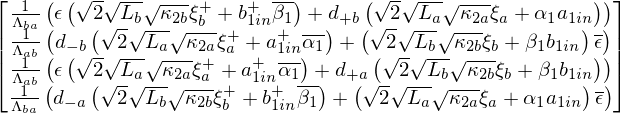

In [20]:
a = (N*(A*ain+S*xi))
simplify(a)

So we have the following equations for the intracavity field:
$$\begin{align}
\frop{a}(\nu) &= \frac{1}{\Lambda_{ba}(\nu)}\lsz d_{+b}(\nu) \alpha_1(\nu) \frop{a}_{1,in}(\nu)+\epsilon\beta_1^*(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\right.\\
&\quad\left. \sqrt{\kappa_{2,a}L_a}d_{+b}(\nu)\frop{\xi}_a(\nu) +  \sqrt{\kappa_{2,b}L_b}\epsilon\frop{\xi}^\dagger_b(-\nu) \rsz\\
\frop{a}^\dagger(-\nu) &=\frac{1}{\Lambda_{ab}(\nu)}\lsz d_{-b}(\nu) \alpha_1^*(-\nu) \frop{a}^\dagger_{1,in}(-\nu)+\epsilon^*\beta_1(\nu)\frop{b}_{1,in}(\nu)+\right.\\
&\quad\left. \sqrt{\kappa_{2,a}L_a}d_{-b}(\nu)\frop{\xi}^\dagger_a(-\nu) +  \sqrt{\kappa_{2,b}L_b}\epsilon^*\frop{\xi}_b(\nu) \rsz\\
\frop{b}(\nu) &=\frac{1}{\Lambda_{ab}(\nu)}\lsz \epsilon \alpha_1^*(-\nu) \frop{a}^\dagger_{1,in}(-\nu)+d_{+a}(\nu)\beta_1(\nu)\frop{b}_{1,in}(\nu)+\right.\\
&\quad\left. \sqrt{\kappa_{2,b}L_b}d_{+a}(\nu)\frop{\xi}_b(\nu) +  \sqrt{\kappa_{2,a}L_a}\epsilon\frop{\xi}^\dagger_a(-\nu) \rsz\\
\frop{b}^\dagger(-\nu) &=\frac{1}{\Lambda_{ba}(\nu)}\lsz \epsilon^* \alpha_1(\nu) \frop{a}_{1,in}(\nu)+d_{-a}(\nu)\beta_1^*(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\right.\\
&\quad\left. \sqrt{\kappa_{2,b}L_b}d_{-a}(\nu)\frop{\xi}^\dagger_b(-\nu) +  \sqrt{\kappa_{2,a}L_a}\epsilon^*\frop{\xi}_a(\nu) \rsz
\end{align}$$

### Output field
$$\begin{align}
\hat{\tilde{\underline{a}}}_{2,out} &= \hat{\tilde{\underline{a}}}_{2,in} + \dul{\kappa}_2\hat{\tilde{\underline{a}}} = \sqrt{2\pi}\dul{L}_2\frmat{f}_N\lk\frvecop{a}_{1,in}+\dul{\kappa}_1\frvecop{a}\rk + \dul{L}_1\frvecop{\xi}+\dul{\kappa}_2\hat{\tilde{\underline{a}}}=\\
&= \sqrt{2\pi}\dul{L}_2\frmat{f}_N\frvecop{a}_{1,in}+\dul{L}_1\frvecop{\xi}-i\lk\sqrt{2\pi}\dul{L}_2\frmat{f}_N\dul{\kappa}_1 + \dul{\kappa}_2\rk\frmat{N}\lk\frmat{A}_1\,\frvecop{a}_{1,in} + \dul{\kappa}_2\dul{L}_1\,\frvecop{\xi}\rk =\\
&= \lsz\sqrt{2\pi}\dul{L}_2\frmat{f}_N -i\lk\sqrt{2\pi}\dul{L}_2\frmat{f}_N\dul{\kappa}_1 + \dul{\kappa}_2\rk\frmat{N}\frmat{A}_1\rsz\frvecop{a}_{1,in}+\dul{L}_1\lsz\dul{\mathbb{1}}-i\dul{\kappa}_2\lk\sqrt{2\pi}\dul{L}_2\frmat{f}_N\dul{\kappa}_1 + \dul{\kappa}_2\rk\frmat{N}\rsz\frvecop{\xi}=\\
&=\frmat{O}_1\frvecop{a}_{1,in}+\frmat{O}_2\frvecop{\xi}
\end{align}$$

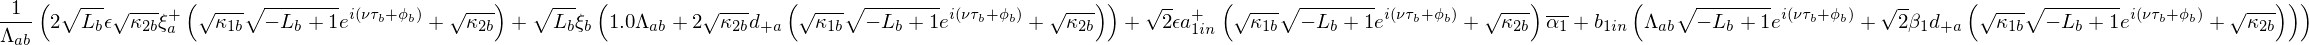

In [21]:
O1 = L2*ftil+(L2*ftil*kap1+kap2)*N*A
O2 = L1*(np.identity(4)-I*kap2*(L2*ftil*kap1+kap2)*N)
aout = O1*ain + O2*xi
simplify(aout[2])

Therefore the output fields have the following expressions:
$$\begin{align}
\frop{a}_{2,out}(\nu) &=  \overbrace{\lk \sqrt{1-L_a} e^{i\lk\nu\tau_a+\phi_a\rk}+\frac{d_{+b}(\nu)}{\Lambda_{ba}(\nu)}\alpha_1(\nu)\alpha_2(\nu)\rk}^{\frac{D_a(\nu)}{\Lambda_{ba}(\nu)}}\frop{a}_{1,in}(\nu)+\overbrace{\sqrt{L_a}\lk 1+\sqrt{2\kappa_{2,a}}\frac{d_{+b}(\nu)\alpha_2(\nu)}{\Lambda_{ba}}\rk}^{\frac{E_a(\nu)}{\Lambda_{ba}}}\frop{\xi}_a(\nu)+\\
&\quad+\epsilon\frac{\alpha_2(\nu)}{\Lambda_{ba}(\nu)}\lsz\lk\beta^*_1(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\sqrt{2\kappa_{2,a}L_a}\frop{\xi}^\dagger_b(-\nu)\rk\rsz=\\
&=\frac{1}{\Lambda_{ba}(\nu)}\lka D_a(\nu)\frop{a}_{1,in}(\nu)+E_a(\nu)\frop{\xi}_a(\nu)+\epsilon\alpha_2(\nu)\lsz\beta^*_1(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\sqrt{2\kappa_{2,a}L_a}\frop{\xi}^\dagger_b(-\nu)\rsz\rka\\
\frop{a}^\dagger_{2,out}(-\nu) &= \frac{1}{\Lambda_{ab}(\nu)}\lka D^*_a(-\nu)\frop{a}^\dagger_{1,in}(-\nu)+E^*_a(-\nu)\frop{\xi}^\dagger_a(-\nu)+\epsilon^*\alpha^*_2(-\nu)\lsz\beta_1(\nu)\frop{b}_{1,in}(\nu)+\sqrt{2\kappa_{2,a}L_a}\frop{\xi}_b(\nu)\rsz\rka\\
\frop{b}_{2,out}(\nu)&= \frac{1}{\Lambda_{ab}(\nu)}\lka D_b(\nu)\frop{b}_{1,in}(\nu)+E_b(\nu)\frop{\xi}_b(\nu)+\epsilon\beta_2(\nu)\lsz\alpha^*_1(-\nu)\frop{a}^\dagger_{1,in}(-\nu)+\sqrt{2\kappa_{2,b}L_b}\frop{\xi}^\dagger_a(-\nu)\rsz\rka\\
\frop{b}^\dagger_{2,out}(-\nu) &= \frac{1}{\Lambda_{ba}(\nu)}\lka D^*_b(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+E^*_b(-\nu)\frop{\xi}^\dagger_b(-\nu)+\epsilon^*\beta^*_2(-\nu)\lsz\alpha_1(\nu)\frop{a}_{1,in}(\nu)+\sqrt{2\kappa_{2,b}L_b}\frop{\xi}_a(\nu)\rsz\rka
\end{align}$$

## Quadrature variances

The quadratures of the two modes are:
$$\begin{align}
\frop{X}_{\mu,\theta^\prime_\mu}&=\frac{1}{2}\lk\frop{\mu}e^{-i\thetap_\mu/2}+\frop{\mu}^\dagger e^{i\thetap_\mu/2}\rk\\
\frop{Y}_{\mu,\theta^\prime_\mu}&=\frac{1}{2i}\lk\frop{\mu}e^{-i\thetap_\mu/2}-\frop{\mu}^\dagger e^{i\thetap_\mu/2}\rk
\end{align}$$
The generalized quadratures involve both modes:
$$\begin{align}
\frop{X}^G_{\thetap} &= \lk \frop{X}_{a,\thetap_a}+\frop{X}_{b,\thetap_b}\rk\\
\frop{Y}^G_{\thetap} &= \lk \frop{Y}_{a,\thetap_a}- \frop{Y}_{b,\thetap_b}\rk
\end{align}$$
For two-party, two-mode entanglement, the following condition must be satisfied for separability of any CV state (PRL 84:2722 (2000)):
$$\left\langle\lsz\Delta\frop{X}^G_{\thetap}\rsz^2\right\rangle+\left\langle\lsz\Delta\frop{Y}^G_{\thetap}\rsz^2\right\rangle\ge \left|\left\langle\lsz\frop{X}_{a,\thetap_a},\frop{Y}_{a,\thetap_a}\rsz\right\rangle\right|+\left|\left\langle\lsz\frop{X}_{b,\thetap_b},\frop{Y}_{b,\thetap_b}\rsz\right\rangle\right|=1$$



$$\begin{align}
\left\langle\lsz\Delta\frop{X}^G_{\thetap}\rsz^2\right\rangle+\left\langle\lsz\Delta\frop{Y}^G_{\thetap}\rsz^2\right\rangle=\\
=\frac{1}{4}\lka\left\langle\lk\frop{a}e^{-i\thetap_a/2}+\frop{a}^\dagger e^{i\thetap_a/2}+\frop{b}e^{-i\thetap_b/2}+\frop{b}^\dagger e^{i\thetap_b/2}\rk\lk\frop{a}e^{-i\thetap_a/2}+\frop{a}^\dagger e^{i\thetap_a/2}+\frop{b}e^{-i\thetap_b/2}+\frop{b}^\dagger e^{i\thetap_b/2}\rk\right\rangle-\right.\\
\left.-\left\langle\lk\frop{a}e^{-i\thetap_a/2}-\frop{a}^\dagger e^{i\thetap_a/2}-\frop{b}e^{-i\thetap_b/2}+\frop{b}^\dagger e^{i\thetap_b/2}\rk\lk\frop{a}e^{-i\thetap_a/2}-\frop{a}^\dagger e^{i\thetap_a/2}-\frop{b}e^{-i\thetap_b/2}+\frop{b}^\dagger e^{i\thetap_b/2}\rk\right\rangle\rka=\\
=\frac{1}{2}\lka\bra\frop{a}\frop{a}^\dagger\ket+\bra\frop{a}^\dagger\frop{a}\ket+\bra\frop{b}\frop{b}^\dagger\ket+\bra\frop{b}^\dagger\frop{b}\ket+\lk\bra\frop{a}\frop{b}\ket+\bra\frop{b}\frop{a}\ket\rk e^{-i\lk\thetap_a+\thetap_b\rk/2}+\lk\bra\frop{a}^\dagger\frop{b}^\dagger\ket+\bra\frop{b}^\dagger\frop{a}^\dagger\ket\rk e^{i\lk\thetap_a+\thetap_b\rk/2}\rka\\
\bra:\lsz\Delta\frop{X}^G_{\thetap}\rsz^2:\ket+\bra:\lsz\Delta\frop{Y}^G_{\thetap}\rsz^2:\ket=\bra\frop{a}^\dagger\frop{a}\ket+\bra\frop{b}^\dagger\frop{b}\ket+\frac{1}{2}\lka\lk\bra\frop{a}\frop{b}\ket+\bra\frop{b}\frop{a}\ket\rk e^{-i\lk\thetap_a+\thetap_b\rk/2}+\lk\bra\frop{a}^\dagger\frop{b}^\dagger\ket+\bra\frop{b}^\dagger\frop{a}^\dagger\ket\rk e^{i\lk\thetap_a+\thetap_b\rk/2}\rka
\end{align}$$

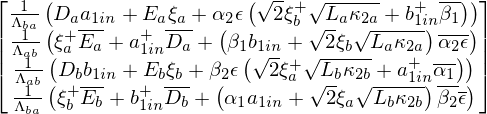

In [6]:
alpha1,beta1,alpha2,beta2,Da,Db,Ea,Eb = symbols('\\alpha_1 \\beta_1 \\alpha_2 \\beta_2 D_a D_b E_a E_b')
thetapa,thetapb,kapa,kapb = symbols('\\theta_pa \\theta_pb \kappa_a \kappa_b')
aout = Matrix([1/(Lba)*(Da*a1in+Ea*xia+alpha2*eps*(conjugate(beta1)*bd1in+sqrt(2*kap2a*La)*xidb)),\
               1/(Lab)*(conjugate(Da)*ad1in+conjugate(Ea)*xida+\
                        conjugate(alpha2)*conjugate(eps)*(beta1*b1in+sqrt(2*kap2a*La)*xib)),\
               1/(Lab)*(Db*b1in+Eb*xib+beta2*eps*(conjugate(alpha1)*ad1in+sqrt(2*kap2b*Lb)*xida)),\
               1/(Lba)*(conjugate(Db)*bd1in+conjugate(Eb)*xidb+\
                        conjugate(beta2)*conjugate(eps)*(alpha1*a1in+sqrt(2*kap2b*Lb)*xia))])
aout

Terms in the expectation values:
$$
\def\nup{\nu^\prime}
\begin{align}
\bra\frop{a}^\dagger(\nu)\frop{a}\lk\nup\rk\ket=
\end{align}$$


## Numerical calculations

Here I set the appropriate parameters and calculate the general quadrature variance in the units of dB.

In [9]:
from pylab import *
def quadr_spec(kapa=20.,kapb=20.,dela=0.,ra=0.0000000001,rb=0.0000000001,kta=0.,ktb=0.,phia=0.,phib=0.,La=100.,Lb=100.,\
               theta=0,thetapa=-pi,thetapb=pi,x=1.,nui=-25.,nuf=25.,N=20):
    
    kapa = kapa*2.*pi
    kapb = kapb*2.*pi
    theta = theta*pi
    thetapa = thetapa*pi
    thetapb = thetapb*pi
    phia = phia*pi
    phib = phib*pi
    N = N*1000
    
    nu = linspace(nui*2.*pi,nuf*2.*pi,N)
    
    eps = x*kapa*exp(1j*theta)
    Del = kapa*dela
    ta   = kta/kapa
    tb   = ktb/kapb
    kap1a = kapa * ra
    kap1b = kapb * rb
    kap2a = kapa * (1-ra)
    kap2b = kapb * (1-rb)
    ka = 2*sqrt(ra*(1-ra)*(1-La/100))*kapa
    kb = 2*sqrt(rb*(1-rb)*(1-Lb/100))*kapb
    Ema = ka*exp(1j*(nu*ta-phia))
    Emb = kb*exp(1j*(nu*tb-phib))
    Epa = ka*exp(1j*(nu*ta+phia))
    Epb = kb*exp(1j*(nu*tb+phib))
    dma = kapa-1j*(nu-Del) + Epa
    dmb = kapb-1j*(nu+Del) + Epb
    dpa = kapa-1j*(nu+Del) + Ema
    dpb = kapb-1j*(nu-Del) + Emb
    Lab = abs(eps)**2 - dpa*dmb
    Lba = abs(eps)**2 - dpb*dma
    alpha1p = 1/sqrt(2*kap1a) * (2*kap1a+Epa)
    alpha2p = 1/sqrt(2*kap2a) * (2*kap2a+Epa)
    beta1p  = 1/sqrt(2*kap1b) * (2*kap1b+Epb)
    beta2p  = 1/sqrt(2*kap2b) * (2*kap2b+Epb)
    alpha1m = 1/sqrt(2*kap1a) * (2*kap1a+Ema)
    alpha2m = 1/sqrt(2*kap2a) * (2*kap2a+Ema)
    beta1m  = 1/sqrt(2*kap1b) * (2*kap1b+Emb)
    beta2m  = 1/sqrt(2*kap2b) * (2*kap2b+Emb)
    Da = sqrt(1-La/100)*Lba*exp(1j*(nu*ta+phia))+dpb*alpha1p*alpha2p
    Db = sqrt(1-Lb/100)*Lab*exp(1j*(nu*tb+phib))+dpa*beta1p*beta2p
    Ea = sqrt(La/100)*(sqrt(2*kap2a)*dpb*alpha2p+Lba)
    Eb = sqrt(Lb/100)*(sqrt(2*kap2b)*dpa*beta2p+Lab)
    Ma = Da*exp(-1j*thetapa/2)+conj(eps)*alpha1p*beta2m*exp(1j*thetapb/2)
    Mb = Db*exp(-1j*thetapb/2)+conj(eps)*beta1p*alpha2m*exp(1j*thetapa/2)
    Na = Ea*exp(-1j*thetapa/2)+sqrt(2*kap2b*Lb/100)*conj(eps)*beta2m*exp(1j*thetapb/2)
    Nb = Eb*exp(-1j*thetapb/2)+sqrt(2*kap2a*La/100)*conj(eps)*alpha2m*exp(1j*thetapa/2)
    
    XXG = 1/abs(Lba)**2*(abs(Ma)**2+abs(Na)**2)+1/abs(Lab)**2*(abs(Mb)**2+abs(Nb)**2)
    Sout = 10*np.log10(XXG)
    
    figure(1)
    plot(nu/2/pi,Sout,linewidth=2.0)
    xlabel('$\\nu$(MHz)',fontsize = 20.)
    ylabel('$S_{out,\\theta^\prime}(\\nu)$',fontsize = 20.)
    xlim(nui,nuf)
    ylim(-20,20)
    grid(True)
    show()
    figure(2)
    plot(nu/2/pi,abs(Lab)**2,linewidth=2.0)
    xlabel('$\\nu$(MHz)',fontsize = 20.)
    ylabel('$\Lambda_{ab}(\\nu)(MHz^2)$',fontsize = 20.)
    xlim(nui,nuf)
    grid(True)
    show()

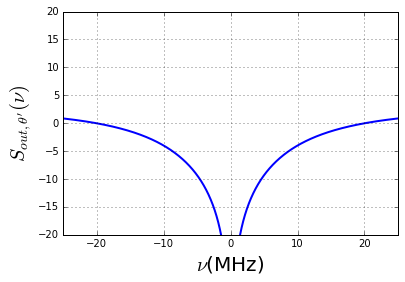

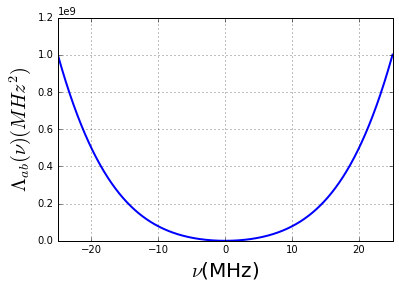

In [12]:
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display

kapa_slider    = widgets.FloatSlider(value = 10., min=0., max=20., step=1., description='$\kappa_a (2\pi)$')
kapb_slider    = widgets.FloatSlider(value = 10., min=0., max=20., step=1., description='$\kappa_b (2\pi)$')
dela_slider    = widgets.FloatSlider(value = 0., min=-1., max=1., step=0.01, description='$\Delta (\kappa_a)$')
ra_slider      = widgets.FloatSlider(value = 0.00001, min=0., max=1., step=0.001, description='$\kappa_{1,a} (\kappa_a)$')
rb_slider      = widgets.FloatSlider(value = 0.00001, min=0., max=1., step=0.001, description='$\kappa_{1,b} (\kappa_b)$')
kta_slider     = widgets.FloatSlider(value = 0., min=0., max=10., step=0.001, description='$\kappa_{a}\\tau_a$')
ktb_slider     = widgets.FloatSlider(value = 0., min=0., max=10., step=0.001, description='$\kappa_{b}\\tau_b$')
phia_slider    = widgets.FloatSlider(value = 0., min=0., max=2., step=0.01, description='$\phi_a (\pi)$')
phib_slider    = widgets.FloatSlider(value = 0., min=0., max=2., step=0.01, description='$\phi_b (\pi)$')
La_slider      = widgets.FloatSlider(value = 0., min=0., max=100., step=1., description='$L_a (\%)$')
Lb_slider      = widgets.FloatSlider(value = 0., min=0., max=100., step=1., description='$L_b (\%)$')
theta_slider   = widgets.FloatSlider(value = 1., min=-1., max=1., step=0.01, description='$\\theta (\pi)$')
thetapa_slider = widgets.FloatSlider(value = 0., min=-1., max=1., step=0.01, description='$\\theta^\prime_a (\pi)$')
thetapb_slider = widgets.FloatSlider(value = 0., min=-1., max=1., step=0.01, description='$\\theta^\prime_b (\pi)$')
x_slider       = widgets.FloatSlider(value = 1.0, min=0., max=2., step=0.01, description='$|\epsilon| (\kappa)$')
nui_fill       = widgets.FloatText(value=-25., description='Frequency min $(2\pi)$')
nuf_fill       = widgets.FloatText(value=25., description='Frequency max $(2\pi)$')
N_fill         = widgets.IntText(value=20., description='Resolution $\left(10^3 \\right)$')

w = interactive(quadr_spec,kapa=kapa_slider,kapb=kapb_slider,dela=dela_slider,\
                        ra = ra_slider,rb = rb_slider,kta = kta_slider,ktb = ktb_slider,\
                        phia = phia_slider,phib = phib_slider,La = La_slider,Lb = Lb_slider,\
                        theta = theta_slider,thetapa = thetapa_slider,thetapb = thetapb_slider,x = x_slider,\
                        nui = nui_fill, nuf = nuf_fill, N = N_fill
                       )
display(w)
#widgets.VBox([widgets.HBox([widgets.VBox([kapa_slider,dela_slider,ra_slider,kta_slider,phia_slider,La_slider,thetapa_slider]),\
#                            widgets.VBox([kapb_slider,delb_slider,rb_slider,ktb_slider,phib_slider,Lb_slider,thetapb_slider])
#                           ]),
#             widgets.HBox([widgets.VBox([x_slider,theta_slider]),widgets.VBox([nui_fill, nuf_fill, N_fill])]),])

## Stability analysis

In order to determine the stability of the system, the equation of motion can be rearranged in the following way:
\begin{align}
\frac{d}{dt}\ul{X} &= -\dul{\Delta}_X\ul{X}(t)-\dul{K}\,\dul{\Phi}\,\ul{X}_\tau(t)\\
\ul{X}(t) &= \lka X_{a,\theta}(t),Y_{a,\theta}(t),X_{b,\theta}(t),Y_{b,\theta}(t)\rka\\
\dul{\Delta}_X &= \left(\begin{matrix} 
\kappa_a & -\Delta & -|\epsilon| & 0 \\
\Delta & \kappa_a & 0 & |\epsilon| \\
-|\epsilon| & 0 & \kappa_b & \Delta \\
0 & |\epsilon| & -\Delta & \kappa_b\end{matrix}\right)\\
\ul{X}_\tau(t) &= \lka X_{a,\theta}(t-\tau_a),Y_{a,\theta}(t-\tau_a),X_{b,\theta}(t-\tau_b),Y_{b,\theta}(t-\tau_b)\rka\\
\dul{\Phi} &=\left(\begin{matrix} 
\cos{\phi_a} & -\sin{\phi_a} & 0 & 0 \\
\sin{\phi_a} & \cos{\phi_a} & 0 & 0 \\
0 & 0 & \cos{\phi_b} & -\sin{\phi_b} \\
0 & 0 & \sin{\phi_b} & \cos{\phi_b}\end{matrix}\right)
\end{align}

The behaviour close to the steady states can be described by suggesting exponential time-evolution $(X_i(t) = X_i(0)e^{\lambda t},Y_i(t) = Y_i(0)e^{\lambda t})$. Then the following should be satisfied:

\begin{align}
\left(\begin{matrix} 
\lk\lambda+\kappa_a+k_a\cos{\phi_a}e^{-\lambda\tau_a}\rk & -\lk\Delta+k_a\sin{\phi_a}e^{-\lambda\tau_a}\rk & -|\epsilon| & 0 \\
\lk\Delta+k_a\sin{\phi_a}e^{-\lambda\tau_a}\rk & \lk\lambda+\kappa_a+k_a\cos{\phi_a}e^{-\lambda\tau_a}\rk & 0 & |\epsilon| \\
-|\epsilon| & 0 & \lk\lambda+\kappa_b+k_b\cos{\phi_b}e^{-\lambda\tau_b}\rk & \lk\Delta-k_b\sin{\phi_b}e^{-\lambda\tau_b}\rk \\
0 & |\epsilon| & -\lk\Delta-k_b\sin{\phi_b}e^{-\lambda\tau_b}\rk & \lk\lambda+\kappa_b+k_b\cos{\phi_b}e^{-\lambda\tau_b}\rk\end{matrix}\right)\,\left(\begin{matrix}\tilde{X}_a\\\tilde{Y}_a\\\tilde{X}_b\\\tilde{Y}_b \end{matrix}\right)=0
\end{align}

In [40]:
from sympy import *
import numpy as np
from IPython.display import display, Math, Latex
init_printing(use_unicode=True)

Ra,Ia,Rb,Ib = symbols('R_a I_a R_b I_b')

Stab = Matrix([[Ra,-Ia,-eps,0],\
               [Ia,Ra,0,eps],\
              [-eps,0,Rb,Ib],\
              [0,eps,-Ib,Rb]])
factor(Stab.det())

In [29]:
eps